# 將數據轉換為csv檔案
將以下格式的數據放到`data.txt`中
```txt
voltage	current	power
4.62	1.08	4.9896
4.62	1.12	5.1744
4.59	1.11	5.0949
```
如果有相同情況的數據，會將原檔案名字加上(1), (2) ...的編號
1. 把數據放到`data.txt`
2. 依照測試資料更改檔案名稱(名稱可重複)
3. 資料是否異常

Run All

In [54]:
import os
import csv

"""
輸出檔案名稱以及是否為正常資料
"""
output_filename = "73_關螢幕_變壓器生鏽_夜市線正常.csv"
is_normal = False

base_dataset_dir = "dataset"

normal_dir = os.path.join(base_dataset_dir, "normal")
abnormal_dir = os.path.join(base_dataset_dir, "abnormal")

os.makedirs(normal_dir, exist_ok=True)
os.makedirs(abnormal_dir, exist_ok=True)

# 檢查並處理重複檔案名
def get_unique_filename(folder, filename):
    base_name, ext = os.path.splitext(filename)  
    new_filename = filename
    counter = 1
    while os.path.exists(os.path.join(folder, new_filename)):
        new_filename = f"{base_name}({counter}){ext}"
        counter += 1
    return new_filename

# 確定輸出資料夾為正常或異常
if is_normal:
    output_folder = normal_dir
else:
    output_folder = abnormal_dir

# 確定最終檔案名稱
if os.path.exists(os.path.join(output_folder, output_filename)):
    output_filename = get_unique_filename(output_folder, output_filename)

output_path = os.path.join(output_folder, output_filename)

with open('data.txt', 'r') as infile, open(output_path, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    for line in infile:
        row = line.strip().split()
        writer.writerow(row)

print(f"CSV 檔案儲存在：{output_path}")

CSV 檔案儲存在：dataset/abnormal/73_關螢幕_變壓器生鏽_夜市線正常(1).csv


# 數據圖表設定和繪圖
讀取轉換完的csv檔案並繪製成圖儲存在`./figures`資料夾中

圖表已保存為 ./figures/abnormal/73_關螢幕_變壓器生鏽_夜市線正常(1).pdf


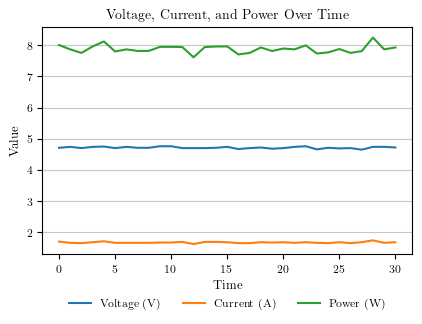

In [55]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 設置 Matplotlib 與 LaTeX 的兼容性
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "figure.titlesize": 10,
})

# 設置圖表尺寸
width_pt = 345  
inches_per_pt = 1.0 / 72.27
golden_ratio = (5**0.5 - 1) / 2
width_in = width_pt * inches_per_pt
height_in = width_in * golden_ratio

def plot_and_save_csv(output_path, output_filename):
    """
    讀取 CSV 檔案並繪製圖表，然後保存為 PDF。
    output_path (str): 使用Pandas讀取CSV檔案的完整路徑，。
    output_filename (str): 原始的 CSV 檔案名稱（包含 .csv）。
    """
    # 去掉 .csv 後綴
    base_filename = os.path.splitext(output_filename)[0]
    
    # 讀取資料
    data = pd.read_csv(output_path)
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(width_in, height_in))
    ax.plot(data.index, data['voltage'], label='Voltage (V)')
    ax.plot(data.index, data['current'], label='Current (A)')
    ax.plot(data.index, data['power'], label='Power (W)')
    
    # 添加標題和標籤
    ax.set_title('Voltage, Current, and Power Over Time')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)
    
    # 添加網格
    ax.grid(axis='y', alpha=0.7)
    
    # 儲存圖表為 PDF
    if is_normal:
        output_dir = "./figures/normal"
    else:
        output_dir = "./figures/abnormal"
        
    os.makedirs(output_dir, exist_ok=True)  # 確保目錄存在
    output_pdf_path = os.path.join(output_dir, f"{base_filename}.pdf")
    fig.savefig(output_pdf_path, bbox_inches='tight')
    print(f"圖表已保存為 {output_pdf_path}")

plot_and_save_csv(output_path, output_filename)